# EDA for Airbnb Open Data

This notebook performs **Exploratory Data Analysis (EDA)** on the Airbnb dataset (or any similar dataset).  
You can easily modify the `file_path` variable below to use your own dataset.

**Main Steps:**
1. Load data and inspect basic info  
2. Handle missing values & data types  
3. Parse dates automatically  
4. Feature engineering  
5. Visualizations  
6. Save outputs  

---

**Instructions:**  
- Change the value of `file_path` to point to your Excel or CSV file.  
- Run all cells in sequence.  
- Outputs (plots and cleaned data) will be saved automatically.


In [18]:
# === Step 1: Setup and Load Data ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Set your file path here 👇 (can be Excel or CSV)
file_path = "C:\\codes\\EDUNET\\EDUVOISE\\1730285881-Airbnb_Open_Data.xlsx"  # change this to your dataset path
output_dir = "airbnb_eda_outputs"
os.makedirs(output_dir, exist_ok=True)

# Load dataset

df = pd.read_excel(file_path)

print("Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


Dataset loaded successfully!
Shape: (102599, 26)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [19]:
# === Step 2: Inspect Dataset ===
print("\nColumn Information:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum().sort_values(ascending=False).head(20))

# Basic summary
display(df.describe(include='all').transpose().head(15))



Column Information:
id                                         int64
NAME                                      object
host id                                    int64
host_identity_verified                    object
host name                                 object
neighbourhood group                       object
neighbourhood                             object
lat                                      float64
long                                     float64
country                                   object
country code                              object
instant_bookable                         float64
cancellation_policy                       object
room type                                 object
Construction year                        float64
price                                    float64
service fee                              float64
minimum nights                           float64
number of reviews                        float64
last review                       datetime64[ns]

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,102599.0,NaN,NaN,NaN,29146234.52213,1001254.0,15085814.5,29136603.0,43201198.0,57367417.0,16257505.607309
NAME,102329,61280,Home away from home,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host id,102599.0,NaN,NaN,NaN,49254111474.328667,123600518.0,24583328475.0,49117739352.0,73996495817.0,98763129024.0,28538996644.374882
host_identity_verified,102310,2,unconfirmed,51200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host name,102191,13189,Michael,881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood group,102570,7,Manhattan,43792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,102583,224,Bedford-Stuyvesant,7937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,102591.0,NaN,NaN,NaN,40.728094,40.49979,40.68874,40.72229,40.76276,40.91697,0.055857
long,102591.0,NaN,NaN,NaN,-73.949644,-74.24984,-73.98258,-73.95444,-73.93235,-73.70522,0.049521
country,102067,1,United States,102067,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# === Step 3: Handle Data Types ===
# Convert numeric-like columns safely
for col in df.select_dtypes(include='object').columns:
    try:
        df[col] = pd.to_numeric(df[col].str.replace(',', '').str.replace('$', ''), errors='ignore')
    except Exception:
        pass

print("Data type coercion complete!")

C:\Users\ragha\AppData\Local\Temp\ipykernel_13816\3940291026.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col].str.replace(',', '').str.replace('$', ''), errors='ignore')


Data type coercion complete!


In [21]:
# === Step 4: Parse Date Columns ===
date_cols = [c for c in df.columns if 'date' in c.lower() or 'review' in c.lower()]
print("Date-like columns detected:", date_cols)
for c in date_cols:
    df[c] = pd.to_datetime(df[c], errors='coerce')

if date_cols:
    df['EDADate'] = df[date_cols[0]]
    df['EDAYear'] = df['EDADate'].dt.year
    df['EDAMonth'] = df['EDADate'].dt.month
    df['EDADay'] = df['EDADate'].dt.day
    print(f"Date parts extracted from: {date_cols[0]}")
else:
    print("No date columns found.")
df.head()


Date-like columns detected: ['number of reviews', 'last review', 'reviews per month', 'review rate number']
Date parts extracted from: number of reviews


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,EDADate,EDAYear,EDAMonth,EDADay
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000004,6.0,286.0,Clean up and treat the home the way you'd like...,NaN,1970-01-01 00:00:00.000000009,1970.0,1.0,1.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000004,2.0,228.0,Pet friendly but please confirm with me if the...,NaN,1970-01-01 00:00:00.000000045,1970.0,1.0,1.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,NaT,1970-01-01 00:00:00.000000005,1.0,352.0,I encourage you to use my kitchen cooking and ...,NaN,1970-01-01 00:00:00.000000000,1970.0,1.0,1.0
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000004,1.0,322.0,NaN,NaN,1970-01-01 00:00:00.000000270,1970.0,1.0,1.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000003,1.0,289.0,Please no smoking in the house porch or on the...,NaN,1970-01-01 00:00:00.000000009,1970.0,1.0,1.0


In [22]:
# === Step 5: Feature Engineering ===
col_lower = {c.lower(): c for c in df.columns}

# Price per review (safe)
if 'price' in col_lower and 'number of reviews' in col_lower:
    price_col = col_lower['price']
    review_col = col_lower['number of reviews']
    df[price_col] = pd.to_numeric(df[price_col], errors='coerce')
    df[review_col] = pd.to_numeric(df[review_col], errors='coerce')
    df['price_per_review'] = df[price_col] / df[review_col].replace({0: np.nan})
    print("Feature added: price_per_review")

# Host-level aggregation
if 'host id' in col_lower and 'price' in col_lower:
    host_col = col_lower['host id']
    price_col = col_lower['price']
    host_summary = df.groupby(host_col)[price_col].agg(['count', 'mean', 'sum']).reset_index()
    host_summary.rename(columns={'count': 'listings_count', 'mean': 'avg_price', 'sum': 'total_revenue'}, inplace=True)
    print("\nHost summary sample:")
    display(host_summary.head())

print("\nFeature engineering completed!")


Feature added: price_per_review

Host summary sample:


,host id,listings_count,avg_price,total_revenue
0,123600518,1,694.0,694.0
1,124039648,1,548.0,548.0
2,124472619,1,779.0,779.0
3,129756565,1,1170.0,1170.0
4,130349612,1,684.0,684.0



Feature engineering completed!


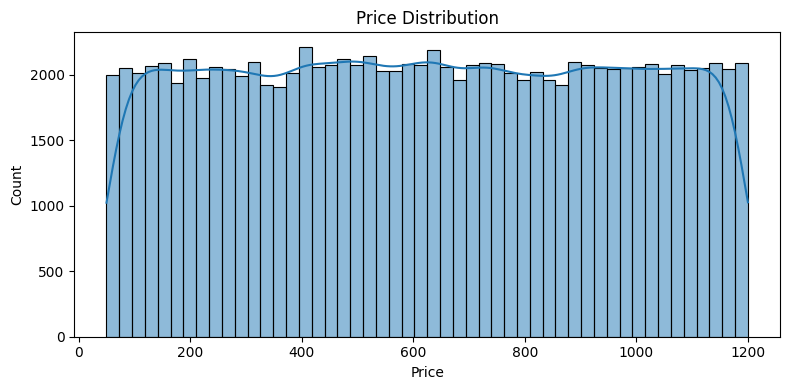

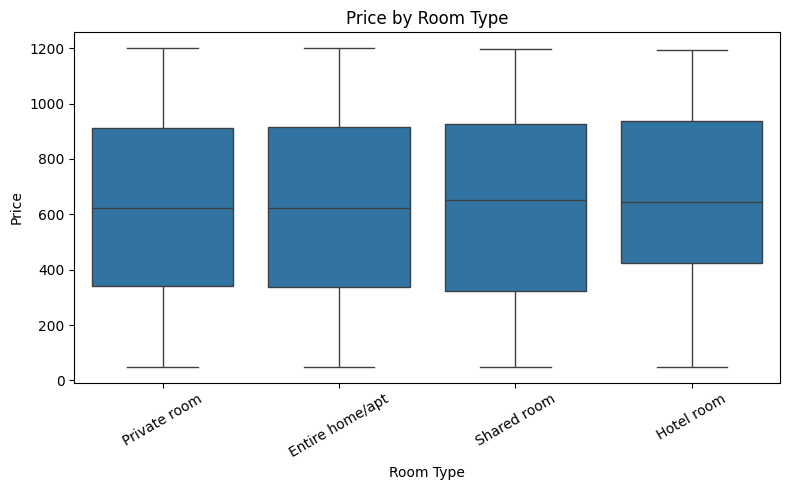

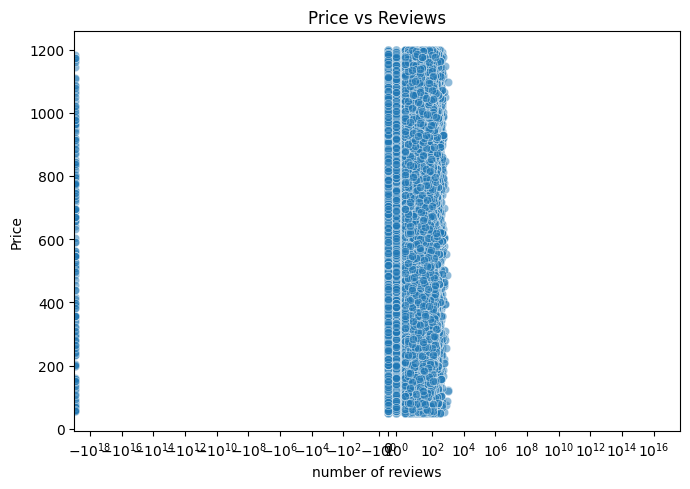

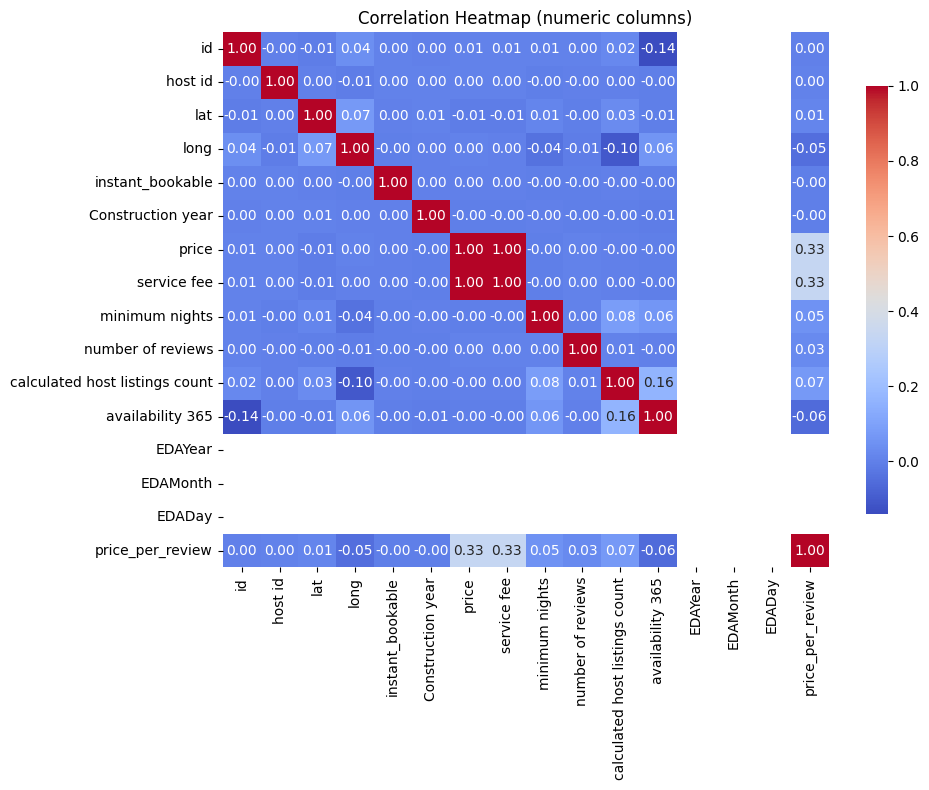

c:\Users\ragha\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


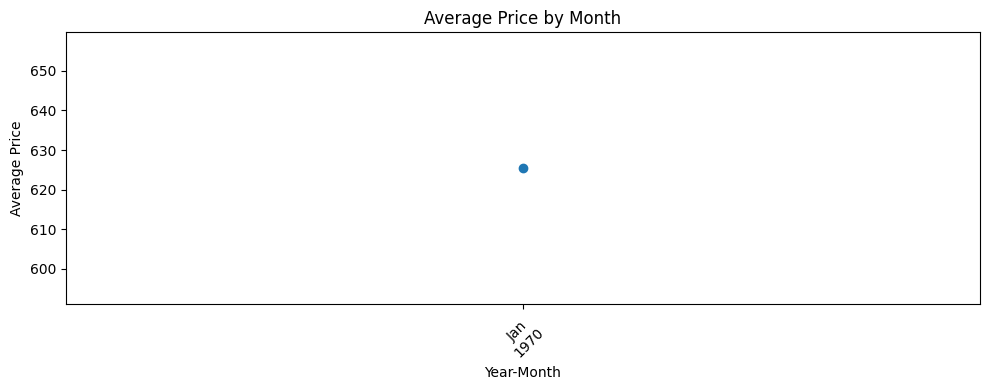

C:\Users\ragha\AppData\Local\Temp\ipykernel_13816\831483095.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hosts.values, y=top_hosts.index.astype(str), palette='viridis')


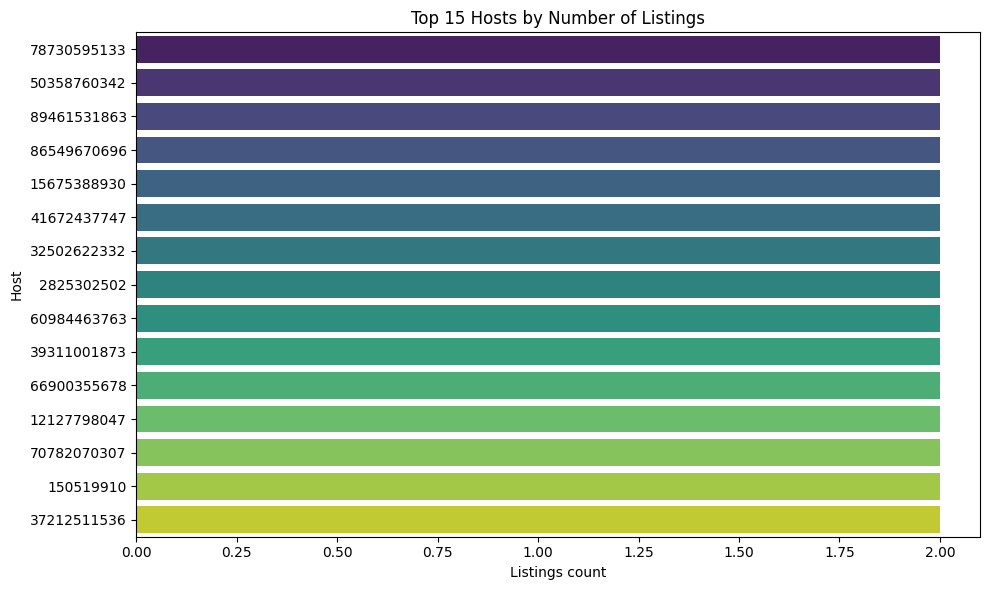

Visualization complete!


In [23]:
# === Step 6: Visualization ===
plt.style.use('default')
import seaborn as sns

# Guard: ensure dataframe is loaded before plotting
if 'df' not in globals():
    print('Dataframe `df` not found. Run the data loading cells (Step 1) first to produce visualizations.')
else:
    col_lower = {c.lower(): c for c in df.columns}

    # --- Price distribution (histogram + KDE) ---
    if 'price' in col_lower:
        price_col = col_lower['price']
        plt.figure(figsize=(8,4))
        sns.histplot(df[price_col].dropna().astype(float), bins=50, kde=True, color='C0')
        plt.title('Price Distribution')
        plt.xlabel('Price')
        plt.tight_layout()
        plt.show()

    # --- Boxplot: price by room type ---
    if 'price' in col_lower and 'room type' in col_lower:
        plt.figure(figsize=(8,5))
        sns.boxplot(x=df[col_lower['room type']].astype(str), y=pd.to_numeric(df[price_col], errors='coerce'))
        plt.title('Price by Room Type')
        plt.xlabel('Room Type')
        plt.ylabel('Price')
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()

    # --- Price vs Reviews scatter (if review count exists) ---
    review_cols = [c for c in df.columns if 'review' in c.lower() and 'number' in c.lower() or c.lower().startswith('reviews') or 'reviews' in c.lower()]
    if 'price' in col_lower and review_cols:
        rev = review_cols[0]
        plt.figure(figsize=(7,5))
        sns.scatterplot(data=df, x=rev, y=price_col, alpha=0.5)
        plt.xscale('symlog')
        plt.title('Price vs Reviews')
        plt.xlabel(rev)
        plt.ylabel('Price')
        plt.tight_layout()
        plt.show()

    # --- Correlation heatmap for numeric features ---
    num_df = df.select_dtypes(include=[np.number]).copy()
    if not num_df.empty:
        corr = num_df.corr()
        plt.figure(figsize=(10,8))
        sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'shrink':0.8})
        plt.title('Correlation Heatmap (numeric columns)')
        plt.tight_layout()
        plt.show()

    # --- Monthly trend of average price (if date parsed earlier) ---
    if 'edadate' in df.columns or 'EDADate' in df.columns:
        date_col = 'EDADate' if 'EDADate' in df.columns else 'edadate'
        tmp = df.copy()
        tmp[date_col] = pd.to_datetime(tmp[date_col], errors='coerce')
        tmp = tmp.dropna(subset=[date_col])
        if 'price' in col_lower and not tmp.empty:
            tmp['year_month'] = tmp[date_col].dt.to_period('M')
            trend = tmp.groupby('year_month')[price_col].mean().astype(float)
            if not trend.empty:
                plt.figure(figsize=(10,4))
                trend.plot(marker='o')
                plt.title('Average Price by Month')
                plt.xlabel('Year-Month')
                plt.ylabel('Average Price')
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()

    # --- Top hosts by number of listings ---
    host_candidates = [c for c in df.columns if 'host' in c.lower() and ('id' in c.lower() or 'name' in c.lower())]
    if host_candidates:
        host_col = host_candidates[0]
        top_hosts = df[host_col].value_counts().head(15)
        plt.figure(figsize=(10,6))
        sns.barplot(x=top_hosts.values, y=top_hosts.index.astype(str), palette='viridis')
        plt.title('Top 15 Hosts by Number of Listings')
        plt.xlabel('Listings count')
        plt.ylabel('Host')
        plt.tight_layout()
        plt.show()

    print('Visualization complete!')

In [24]:
# === Step 7: Save Cleaned Sample ===
sample_path = os.path.join(output_dir, "airbnb_sample_cleaned.csv")
df.head(500).to_csv(sample_path, index=False)
print("Sample cleaned data saved to:", sample_path)


Sample cleaned data saved to: airbnb_eda_outputs\airbnb_sample_cleaned.csv
